<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

## ***Introduction***

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. 


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass

In [2]:
import warnings
warnings.warn = warn

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

$ \ $

-----

## ***Question 1***

$ \ $

$(1)$ Load the data from the file using the techniques learned today. Examine it.




In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


$ \ $

$(2)$ The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)

In [5]:
print(data.shape[0])

150


$ \ $

$(3)$ The column names. (*Hint:* check out the dataframe `.columns` attribute.)

In [6]:
print(data.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']



$ \ $

$(4)$  The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [7]:
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


$ \ $

-----

## ***Question 2***

$ \ $

$(1)$ Examine the species names and note that they all begin with 'Iris-'. 

In [8]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

$ \ $

$(2)$ Remove this portion of the name so the species name is shorter.

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [9]:
data['species'] = data["species"].str.replace('Iris-', '')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


$ \ $

-----

## ***Question 3***

$(1)$ Determine the number of each species present. (*Hint:* check out the series `.value_counts` method.)

In [10]:
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

$ \ $

$(2)$ Determine the mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

$ \ $

***Hint:*** for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.


In [11]:
stats_df = data.describe()
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
50%,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [13]:
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


$ \ $

----

## ***Question 4***

$(1)$ Calculate the mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).

In [14]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


$ \ $

$(2)$  The median of each of these measurements.

*Hint:* You may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) to group by species before calculating the statistic.

In [16]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


$ \ $ 

$(3)$ If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01#applying-multiple-functions-at-once) for a hint.

In [17]:
data.groupby('species').agg(['mean', 'median'])  
data.groupby('species').agg([np.mean, np.median])  

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [18]:
columns = data.columns
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
from pprint import pprint

agg_dict = {col: ['mean', 'median'] for col in columns if col != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


In [20]:
data.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

$ \ $

---

## ***Question 5***

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

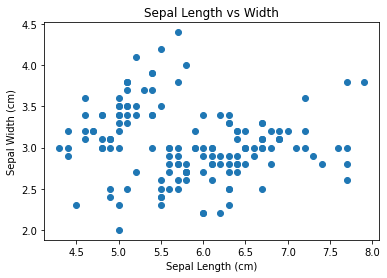

In [22]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data["sepal_length"], data["sepal_width"])

# Label the axes
ax.set(xlabel = 'Sepal Length (cm)',
       ylabel = 'Sepal Width (cm)',
       title = 'Sepal Length vs Width');

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

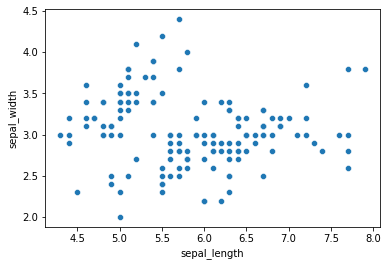

In [23]:
sns.scatterplot(data = data, x = "sepal_length", y = "sepal_width")

$ \ $

---

## ***Question 6***

Make a histogram of any one of the four features. Label axes and title it as appropriate.


In [24]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


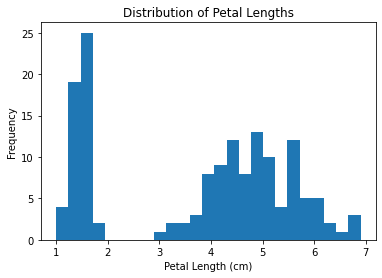

In [25]:
ax = plt.axes()

ax.hist(data["petal_length"], bins = 25)

ax.set(xlabel = 'Petal Length (cm)', 
       ylabel = 'Frequency',
       title = 'Distribution of Petal Lengths');

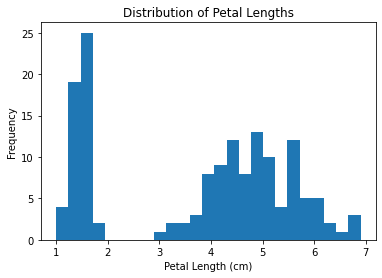

In [26]:
ax = data["petal_length"].plot.hist(bins=25)

ax.set(xlabel = 'Petal Length (cm)', 
       ylabel = 'Frequency',
       title = 'Distribution of Petal Lengths');

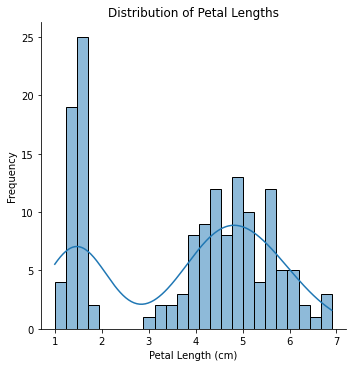

In [28]:
image = sns.displot(data=data, x="petal_length", bins=25,  kde=True)

image.set(xlabel = 'Petal Length (cm)', 
          ylabel = 'Frequency',
          title = 'Distribution of Petal Lengths');

$ \ $

---

## ***Question 7***

$(1)$ Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed (superpuesto). 

In [29]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


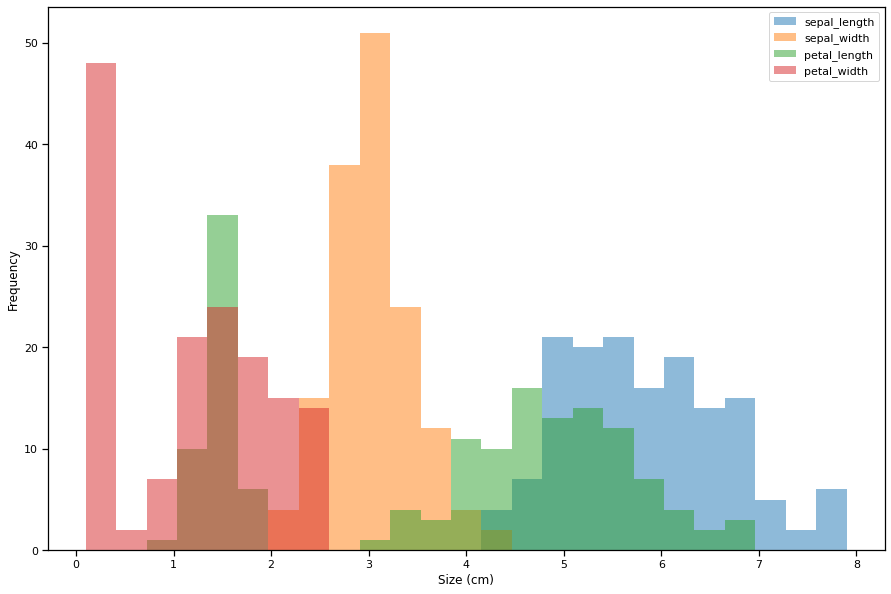

In [30]:
sns.set_context('notebook')

ax = data.plot.hist(bins = 25, alpha = 0.5, figsize = (15,10))

ax.set_xlabel('Size (cm)')
ax.set_ylabel('Frequency');

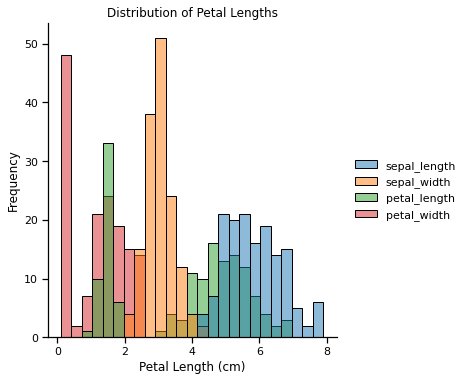

In [31]:
sns.set_context('notebook')


image = sns.displot(data=data, bins=25)


image.set(xlabel = 'Petal Length (cm)', 
          ylabel = 'Frequency',
          title = 'Distribution of Petal Lengths');

$ \ $

$(2)$ If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for Pandas.


In [33]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


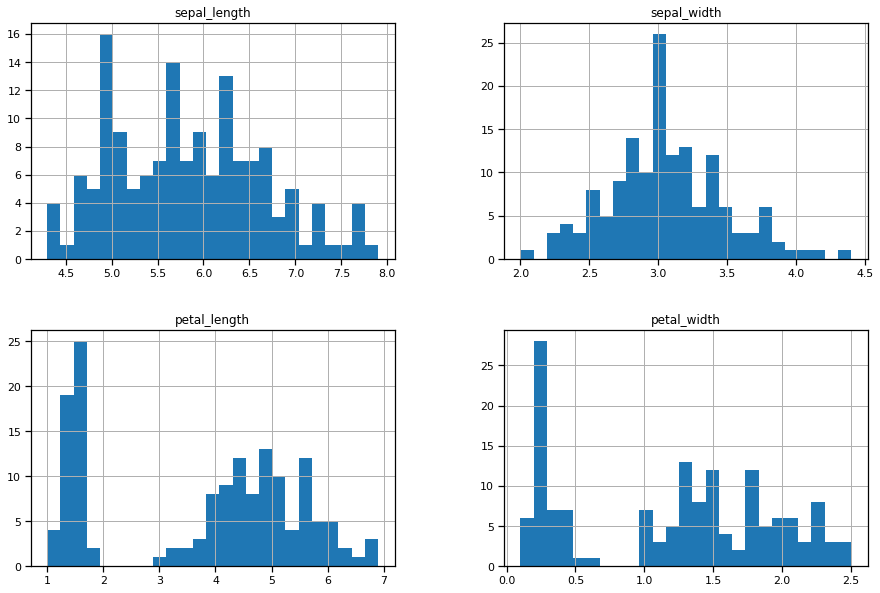

In [32]:
data.hist(bins=25, figsize = (15,10));

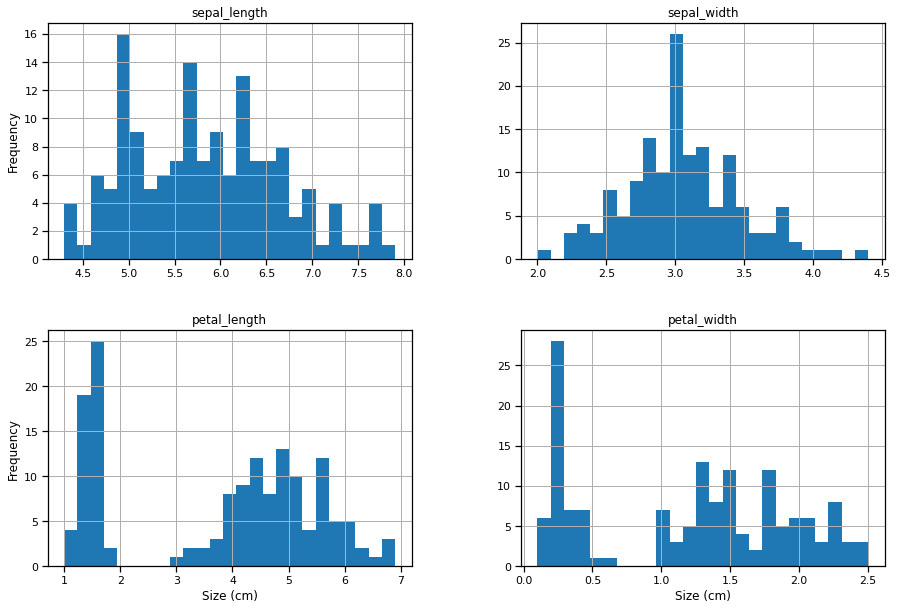

In [34]:
axList = data.hist(bins=25, figsize = (15,10));

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

$ \ $

---

## ***Question 8***

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01#visualization-box).


In [35]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


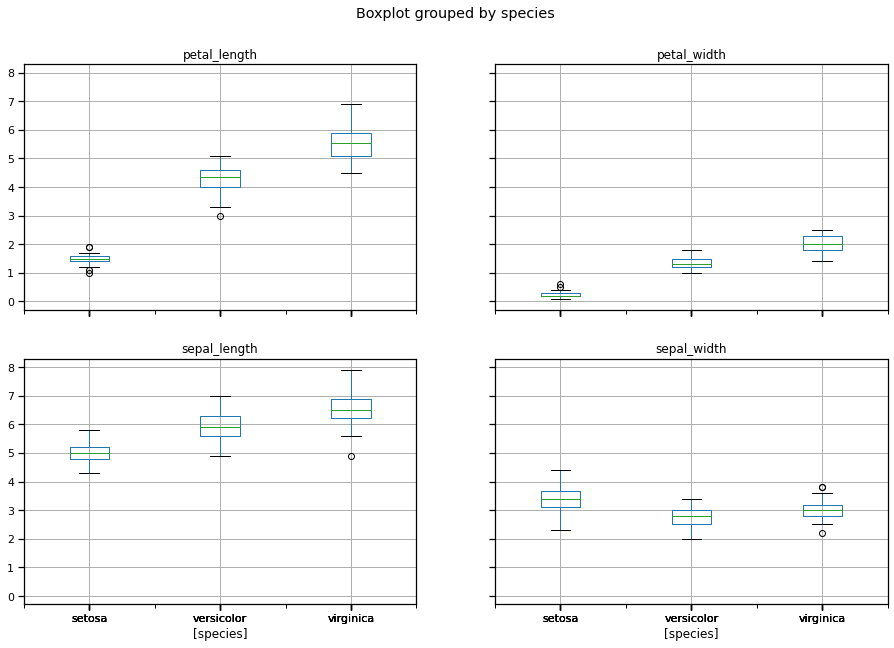

In [36]:
data.boxplot(by='species', figsize = (15,10));

$ \ $

---

## ***Question 9***

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

$\underline{\text{Hint:}}$ you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).




In [37]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [40]:
data.set_index("species")

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [41]:
data.set_index("species").stack().to_frame()

0
species                    
setosa    sepal_length  5.1
          sepal_width   3.5
          petal_length  1.4
          petal_width   0.2
          sepal_length  4.9
...                     ...
virginica petal_width   2.3
          sepal_length  5.9
          sepal_width   3.0
          petal_length  5.1
          petal_width   1.8

[600 rows x 1 columns]

In [43]:
data.set_index("species").stack().to_frame().reset_index()

,species,level_1,0
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


In [42]:
# First we have to reshape the data so there is 
# only a single measurement in each column

new_data = (data
             .set_index("species")
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

new_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


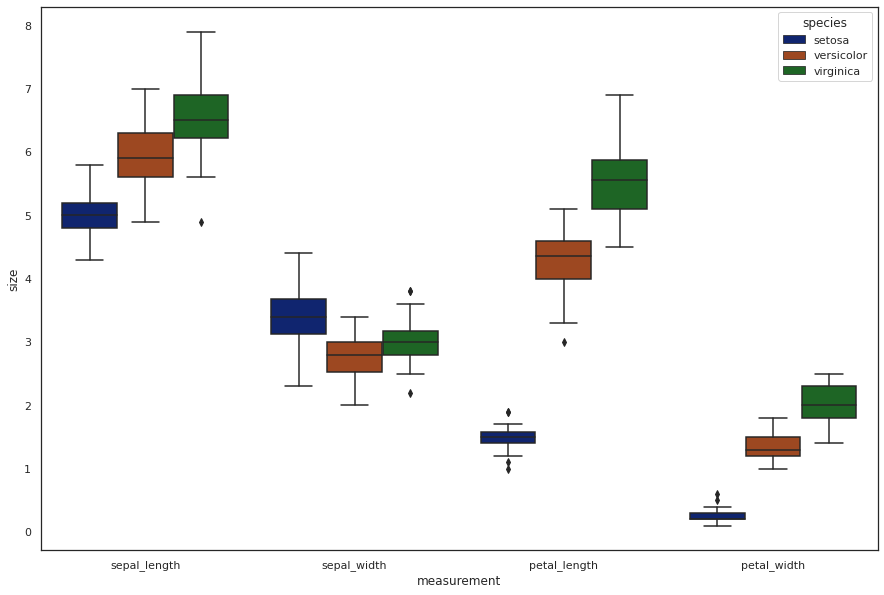

In [46]:
#(0) fondos y estilos
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

#(1) tamaño imagen
plt.figure(figsize=(15,10))

#(2) creación de la imagen
sns.boxplot(data = new_data, x='measurement', y='size', hue='species');

$ \ $

---

## ***Note (seaborn format).***

Seaborn is very picky (quisquilloso) about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) method as a starting place. Here is an example of a data format that will work:

$ \ $

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0 | setosa  | sepal_length | 5.1  |
| 1 | setosa  | sepal_width  | 3.5  |

$ \ $ 

----

## ***Pairplot***

Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

$ \ $

---

## ***Question 10***

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) with Seaborn to examine the correlation between each of the measurements.

$\underline{\text{Hint:}}$ this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.


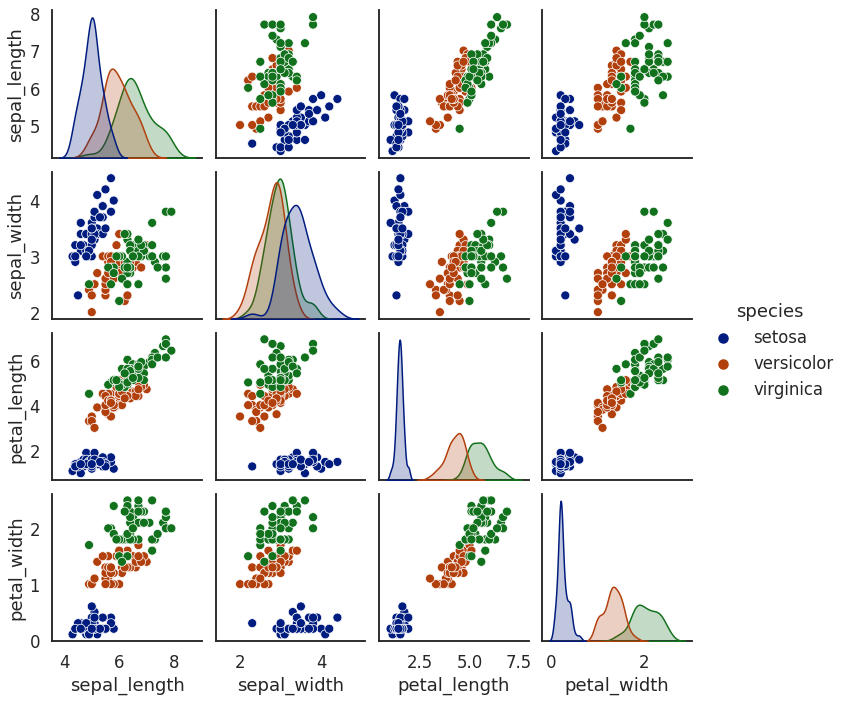

In [47]:
sns.set_context('talk')
sns.pairplot(data, hue='species');

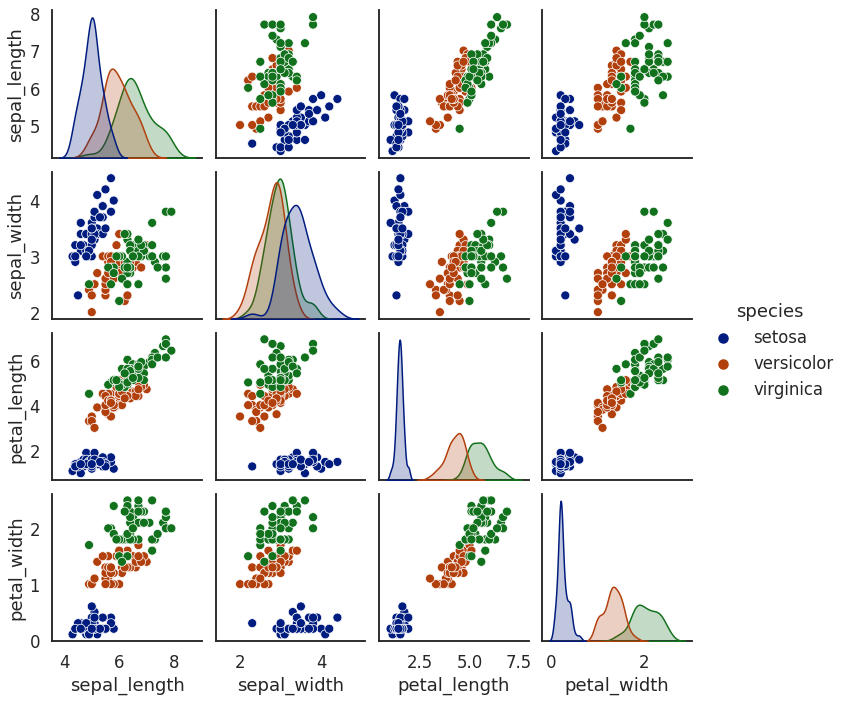

In [48]:
sns.pairplot(data, hue='species');